# 2 Lattice mobility

Example for a setup of the model with non-trivial connectivity between the metapopulations.

To keep it simple, we use a 2D lattice.

In [1]:
import numpy as np
import networkx as nx

from EpiCommute import SIRModel

# Model setup

## Create lattice

We use networkx to create a simple 2D lattice

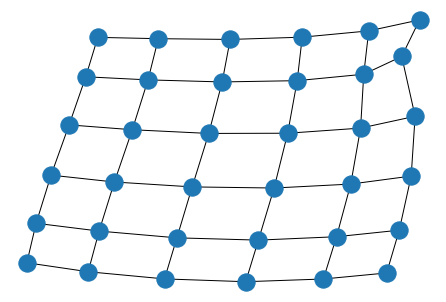

In [3]:
L = 6   # Grid length
M = L*L # Number of subpopulations

G = nx.lattice.grid_2d_graph(L,L,periodic=False)
nx.draw(G)

## Mobility

To add mobility, we use the adjacency matrix of the lattice and add some random noise

In [4]:
# Adjacency matrix
A = nx.adj_matrix(G).toarray()

# Mobility matrix is adjacency matrix with some noise
mobility = np.random.rand(M, M) * A

# Choose random subpopulation sizes
subpopulation_sizes = np.random.randint(10,100,M)

In [5]:
# outbreak source is the first compartment
outbreak_source=0

# Initialize the model
model = SIRModel(
            mobility,
            subpopulation_sizes,
            outbreak_source=outbreak_source,
            dt=0.1,                   # simulation time interval
            dt_save=1,                # time interval when to save observables
            I0=10,                    # number of initial infected
            VERBOSE=True              # print verbose output
        )

In [6]:
result = model.run_simulation()

Starting Simulation ...
Simulation completed
Time: 0min 10.41s


# Results

## Epidemic curve

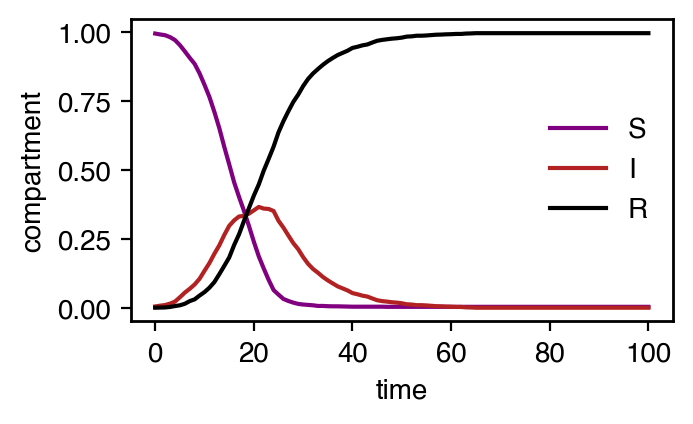

In [7]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('figure', dpi=200)

figure = plt.figure(figsize=(3.5,2))
plt.plot(result['t'], result['S_total'], label='S', color='purple')
plt.plot(result['t'], result['I_total'], label='I', color='firebrick')
plt.plot(result['t'], result['R_total'], label='R', color='k')
plt.legend(frameon=False, loc='center right')
plt.xlabel("time")
plt.ylabel("compartment")
plt.show()

## Spread of infected

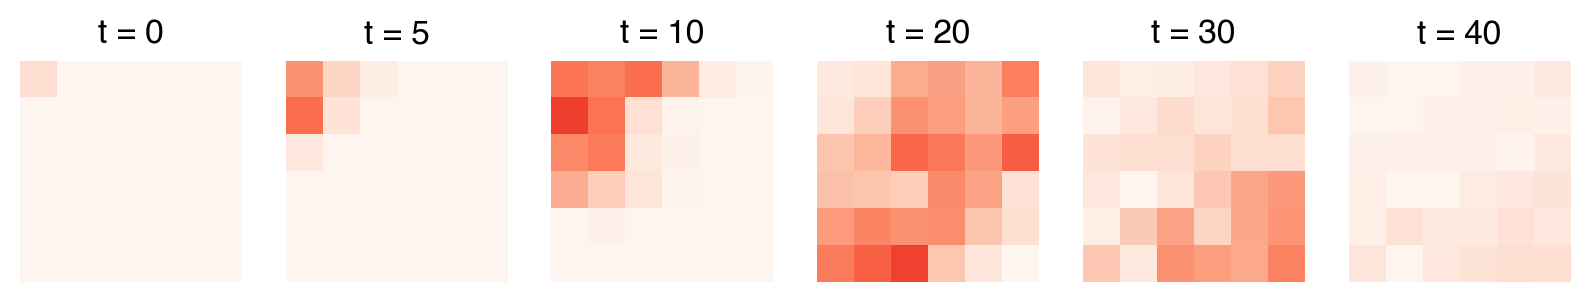

In [8]:
fig, axes = plt.subplots(1,6,figsize=(10,2))
t_indices = [0,5,10,20,30,40]
for t_index, ax in zip(t_indices, axes):
    
    ax.imshow(result['I'][t_index].reshape(L,L), vmax=1, interpolation=None, cmap='Reds')
    ax.set_title("t = {:.0f}".format(result['t'][t_index]))
    ax.axis('off')

plt.show()

## Arrival times

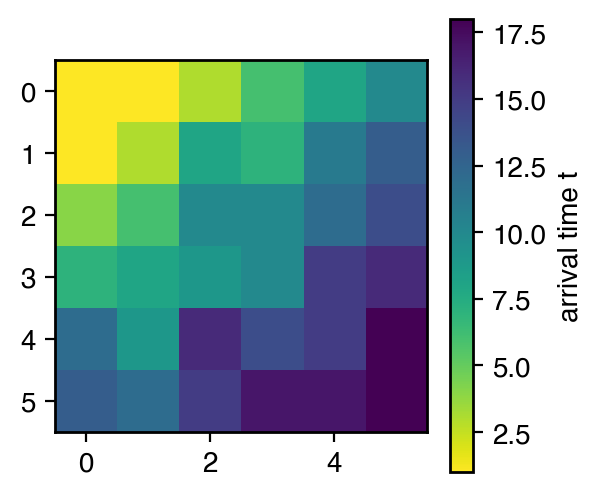

In [9]:
fig = plt.figure(figsize=(3,3))
im = plt.imshow(result['T_arrival'].reshape(L,L), cmap='viridis_r', interpolation=None)
cax = fig.colorbar(im)
cax.set_label("arrival time t")
# plt.gca().axis('off')
plt.show()